# Import software libraries and load the dataset #

In [2]:
import sys                                             # Read system parameters.
import numpy as np                                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                                    # Manipulate and analyze data.
import matplotlib as mpl                               # Create 2D charts.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns                                   # Perform data visualization.
import sklearn                                         # Perform data mining and analysis.
from sklearn import datasets

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- Seaborn {}'.format(sns.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

# Load the dataset.
diabetes = datasets.load_diabetes()
print('Loaded {} records.'.format(len(diabetes.data)))

Libraries used in this project:
- Python 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
- NumPy 1.26.4
- pandas 2.2.2
- Matplotlib 3.9.2
- Seaborn 0.13.2
- scikit-learn 1.5.1

Loaded 442 records.


# Get acquainted with the dataset

In [3]:
# Convert array to pandas DataFrame.
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
# View data types and see if there are missing entries.
df.dtypes
# View first 10 records.
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# Examine the distribution of various features

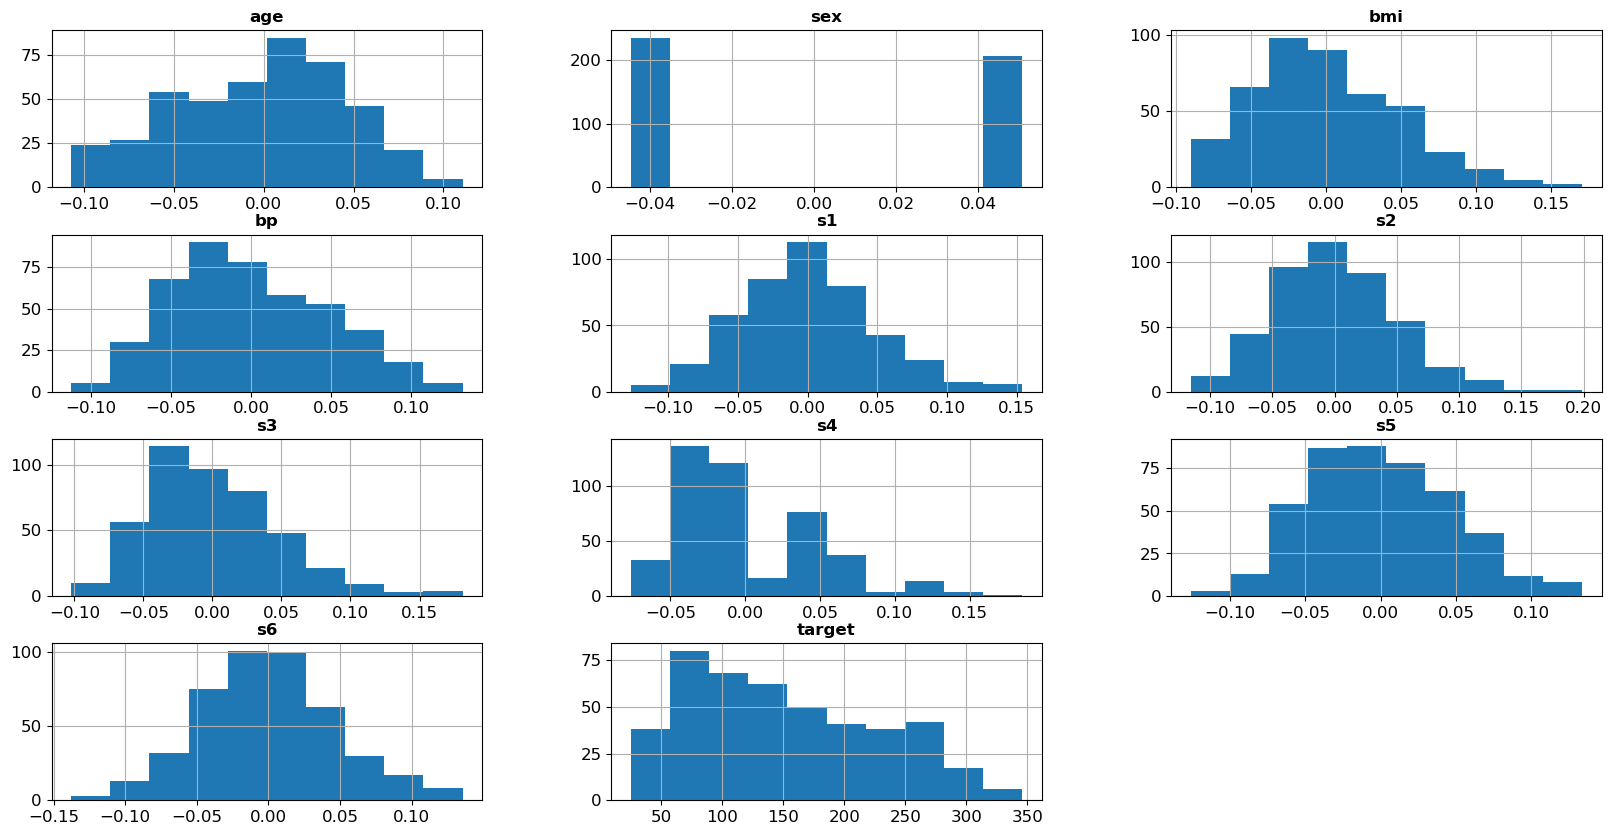

In [4]:
# Use Matplotlib to plot distribution histograms for all features.
mpl.rc('axes', titlesize=12, titleweight='bold')
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


df.hist(figsize=(20,10))
plt.show()

# Examine a general summary of statistics

In [5]:
# View summary statistics (mean, standard deviation, min, max, etc.) for each feature.
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


# Look for columns that correlate with `target` (disease progression)#

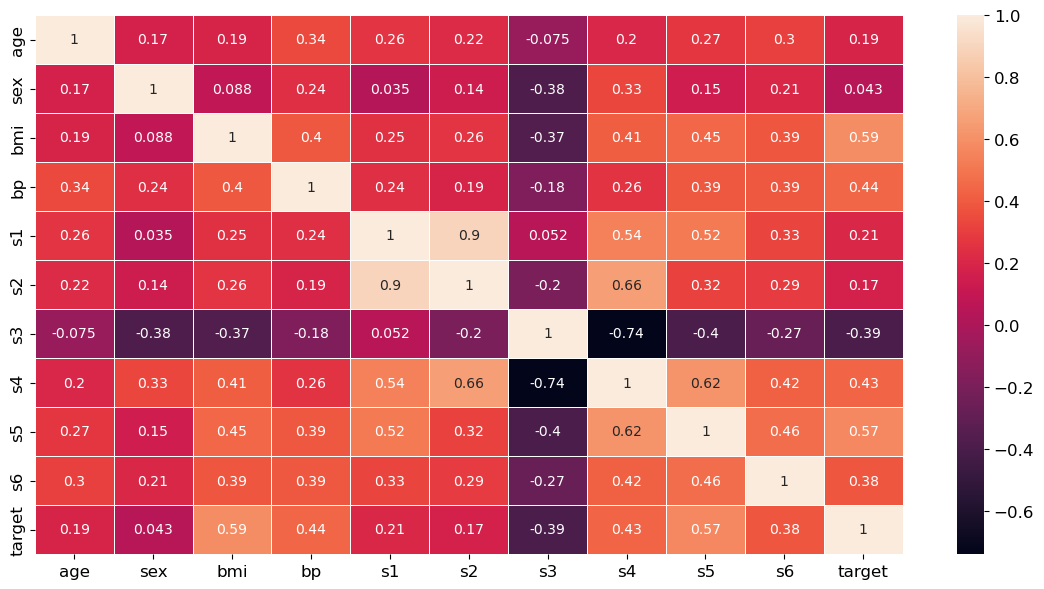

In [6]:
# View the correlation values for each feature compared to the label.
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), 
            annot=True,
            linewidths=0.7)
plt.show()

In [7]:
# Split the training and test datasets and their labels.
from sklearn.model_selection import train_test_split

Y = df['target']
X = df.copy().drop(columns=['target'])


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 2 )

# Compare the number of rows and columns in the original data to the training and test sets.
print(f'Train sample (x) is {x_train.shape}. Train sample (y) {y_train.shape}')
print(f'Test sample (x) is {x_test.shape}. Test sample (y) {y_test.shape}')

Train sample (x) is (353, 10). Train sample (y) (353,)
Test sample (x) is (89, 10). Test sample (y) (89,)


# Drop columns that won't be used for training

In [8]:
# Drop the three features that have the least correlation with the label.

x_train = x_train.drop(columns=['age', 'sex', 's2'])

x_test = x_test.drop(columns=['age', 'sex', 's2'])

print(f'Name of train columns:{x_train.columns}')
print(f'Name of train columns{x_test.columns}')

Name of train columns:Index(['bmi', 'bp', 's1', 's3', 's4', 's5', 's6'], dtype='object')
Name of train columnsIndex(['bmi', 'bp', 's1', 's3', 's4', 's5', 's6'], dtype='object')


# Create a linear regression model

In [9]:
from sklearn.linear_model import LinearRegression

# Construct a basic linear regression class object.
lr = LinearRegression()

# Fit the training data to the regression object.
lr.fit(x_train, y_train)

LinearRegression()

# Compare the first ten predictions to actual values

In [10]:
# Make predictions on the test set.
prediction = lr.predict(x_test)


compering_values = pd.DataFrame({'Predicted' : prediction, 
                                 'Actual' : y_test.values})

# View examples of the predictions compared to actual disease progression.

compering_values.head(10)

,Predicted,Actual
0,148.143899,73.0
1,219.370880,233.0
2,133.415307,97.0
3,97.435202,111.0
4,276.562744,277.0
5,253.062925,341.0
6,109.370423,64.0
7,108.095400,68.0
8,99.214441,65.0
9,197.396382,178.0


# Calculate the error between predicted and actual values

In [11]:
from sklearn.metrics import mean_squared_error

# Print the mean squared error (MSE) for the model's predictions on the test set.
print(f'MSE is {mean_squared_error(y_test,prediction):.2f}')

MSE is 3297.46


# Plot lines of best fit for four features

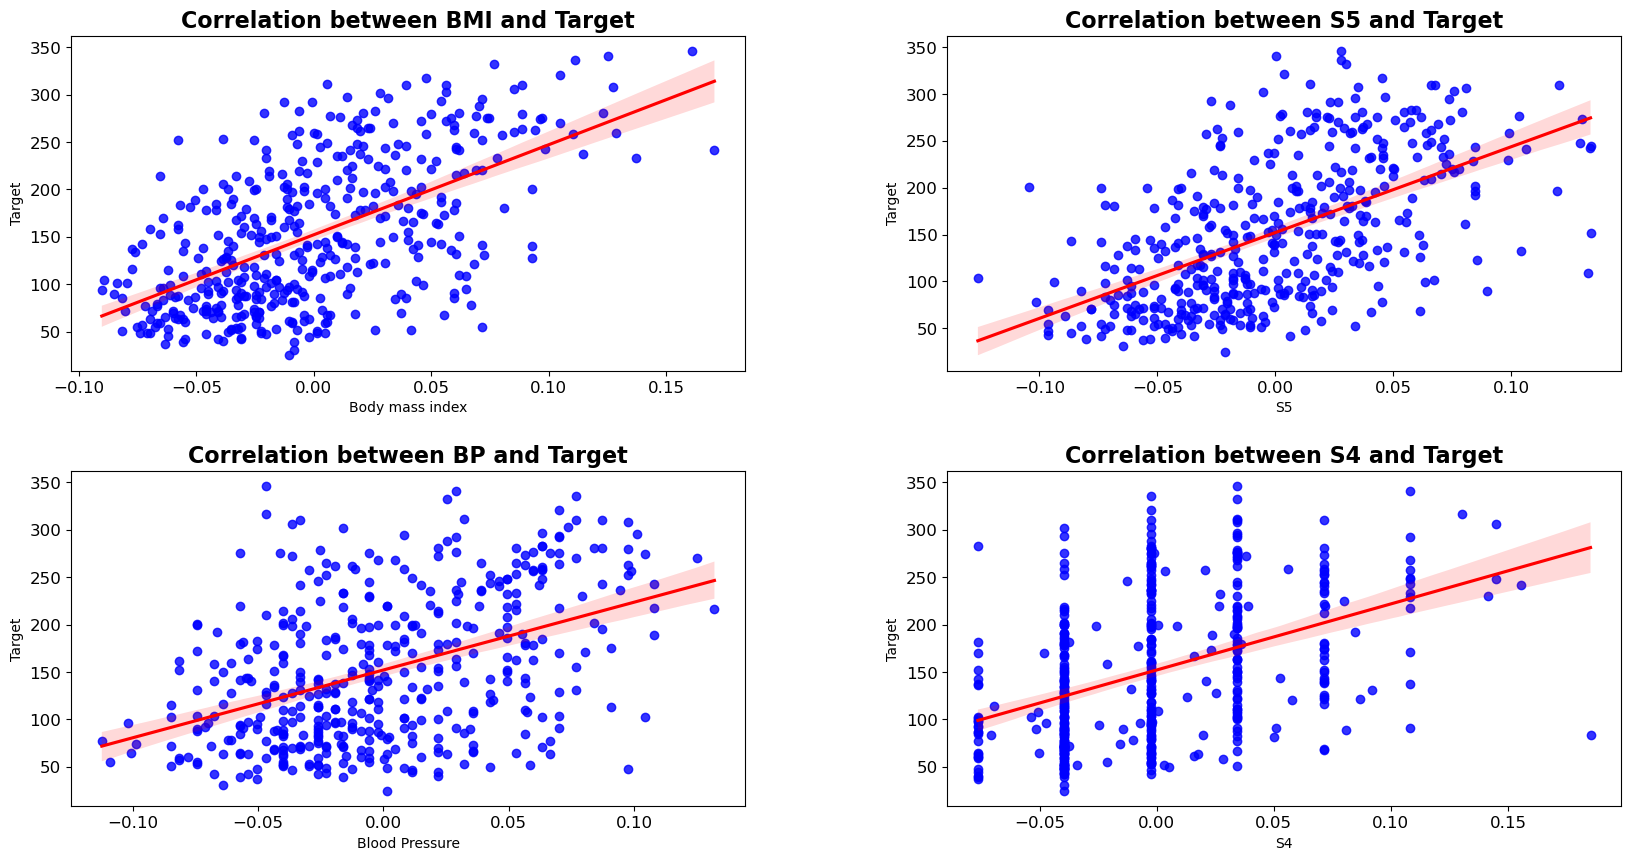

In [12]:
# Use Seaborn to create subplots for the four features that have the strongest correlation with the label.
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

plt.rcParams.update({
    'font.size': 14,            
    'font.family': 'serif',     
    'xtick.labelsize': 12,      
    'ytick.labelsize': 12,      
})

sns.regplot(df, x ='bmi', y = 'target', ax=ax[0, 0], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
ax[0, 0].set_title('Correlation between BMI and Target', fontsize=16, fontweight='bold')
ax[0, 0].set_xlabel('Body mass index')
ax[0, 0].set_ylabel('Target')

sns.regplot(df, x='s5', y='target', ax=ax[0, 1], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
ax[0, 1].set_title('Correlation between S5 and Target', fontsize=16, fontweight='bold')
ax[0, 1].set_xlabel('S5')
ax[0, 1].set_ylabel('Target')

sns.regplot(df, x='bp', y='target', ax=ax[1, 0], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
ax[1, 0].set_title('Correlation between BP and Target', fontsize=16, fontweight='bold')
ax[1, 0].set_xlabel('Blood Pressure')
ax[1, 0].set_ylabel('Target')

sns.regplot(df, x='s4', y='target', ax=ax[1, 1], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
ax[1, 1].set_title('Correlation between S4 and Target', fontsize=16, fontweight='bold')
ax[1, 1].set_xlabel('S4')
ax[1, 1].set_ylabel('Target')


plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Показуємо графіки
plt.show()
# Also plot a line of best fit for each feature.